In [3]:
# Step 1: Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Step 2: Load the CSV files and paths
train_df = pd.read_csv('/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/train.csv')
valid_df = pd.read_csv('/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/valid.csv')
test_df = pd.read_csv('/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/test.csv')

In [6]:
# Adding a column to construct the full path to images based on image_id
train_image_dir = '/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/train_images/'
val_image_dir = '/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/val_images/'
test_image_dir = '/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/test_images/'

In [7]:
train_df['image'] = train_df['id_code'].apply(lambda x: os.path.join(train_image_dir, f"{x}.png"))
valid_df['image'] = valid_df['id_code'].apply(lambda x: os.path.join(val_image_dir, f"{x}.png"))
test_df['image'] = test_df['id_code'].apply(lambda x: os.path.join(test_image_dir, f"{x}.png"))

In [14]:
# Convert the 'diagnosis' column to string in the DataFrames
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
valid_df['diagnosis'] = valid_df['diagnosis'].astype(str)
test_df['diagnosis'] = test_df['diagnosis'].astype(str)

In [15]:
# Step 3: Preprocessing the images using ImageDataGenerator

# Use ImageDataGenerator for real-time data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize the pixel values
    rotation_range=20,       # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'      # Fill missing pixels after rotation/translation
)

In [16]:
# Load training images from directories and CSV
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='diagnosis',    # Now this is a string
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical' # Multiclass classification
)

Found 2930 validated image filenames belonging to 5 classes.


In [17]:
val_generator = datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image',
    y_col='diagnosis',    # Now this is a string
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 366 validated image filenames belonging to 5 classes.


In [19]:
# Define ImageDataGenerator for the test set (without data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)  # Just rescale pixel values for testing

In [20]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='diagnosis',    # Now this is a string
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 366 validated image filenames belonging to 5 classes.


In [21]:
# Step 4: Build the CNN Model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 categories for DR
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Step 6: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,  # Adjust as necessary
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-17 17:17:40.219603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-17 17:17:41.733693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.4846 - loss: 1.4604 - val_accuracy: 0.6885 - val_loss: 0.9344
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25


2024-10-17 17:20:58.902866: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-17 17:20:58.943420: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 17:21:10.099987: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-17 17:21:11.782820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6949 - loss: 0.9231 - val_accuracy: 0.6503 - val_loss: 0.9277
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25


2024-10-17 17:24:16.458466: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 17:24:27.075543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:24:31.219107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6813 - loss: 0.9419 - val_accuracy: 0.7022 - val_loss: 0.8681
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25


2024-10-17 17:27:48.055051: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:27:51.423945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.7164 - loss: 0.8401 - val_accuracy: 0.7049 - val_loss: 0.7922
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25


2024-10-17 17:31:10.442732: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 17:31:20.482736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:31:23.651513: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.6966 - loss: 0.8566 - val_accuracy: 0.6967 - val_loss: 0.7811
Epoch 10/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25


2024-10-17 17:35:00.242478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:35:03.794506: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6971 - loss: 0.8638 - val_accuracy: 0.6858 - val_loss: 0.8399
Epoch 12/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/25


2024-10-17 17:38:35.950178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:38:39.197847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6956 - loss: 0.8667 - val_accuracy: 0.7077 - val_loss: 0.8081
Epoch 14/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/25


2024-10-17 17:42:08.099473: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:42:11.101218: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.7019 - loss: 0.8583 - val_accuracy: 0.6803 - val_loss: 0.8877
Epoch 16/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/25


2024-10-17 17:45:28.839646: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 17:45:39.958056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:45:43.241853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.7039 - loss: 0.8458 - val_accuracy: 0.7049 - val_loss: 0.8043
Epoch 18/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/25


2024-10-17 17:49:17.463475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-17 17:49:19.427086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6992 - loss: 0.8564 - val_accuracy: 0.7077 - val_loss: 0.7835
Epoch 20/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/25


2024-10-17 17:52:23.801013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-17 17:52:25.590224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6951 - loss: 0.8430 - val_accuracy: 0.6995 - val_loss: 0.8567
Epoch 22/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 23/25


2024-10-17 17:55:47.124535: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-10-17 17:55:50.521662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7142 - loss: 0.8140 - val_accuracy: 0.7131 - val_loss: 0.7933
Epoch 24/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 25/25


2024-10-17 17:59:07.999674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-17 17:59:09.635934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


92/92 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.7054 - loss: 0.8369 - val_accuracy: 0.7240 - val_loss: 0.7778


In [24]:
# Step 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7457 - loss: 0.7139
Test Accuracy: 75.41%


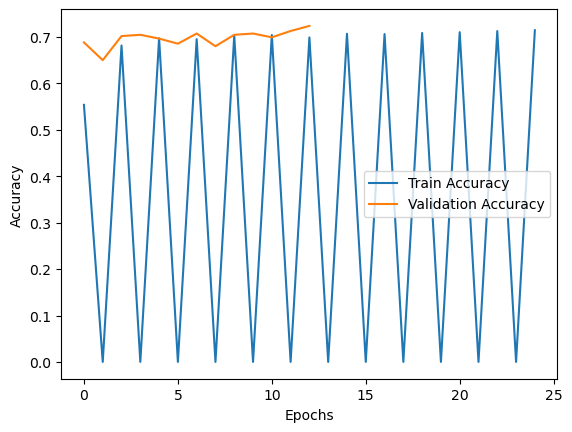

In [25]:
# Step 8: Plot Training/Validation Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

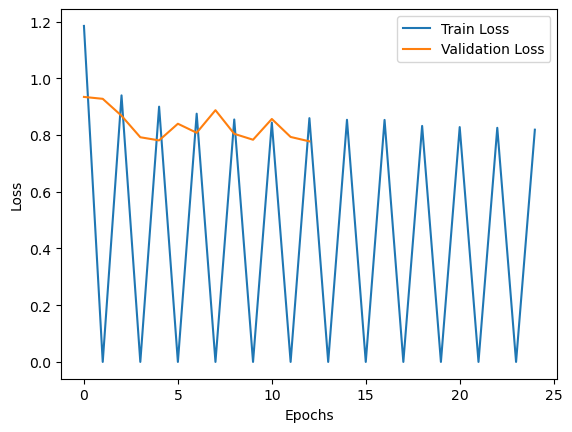

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
import joblib  # or you can use `import pickle`

# Assuming 'model' is your trained model
# Save the model weights and architecture
model.save('model.h5')

# Convert the model into a .pkl file using joblib
joblib.dump('model.h5', 'diabetic_retinopathy_model.pkl')

print("Model saved as diabetic_retinopathy_model.pkl")


Model saved as diabetic_retinopathy_model.pkl
